In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('zomato.csv', encoding='latin1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [87]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Data Analysis Tasks

## 1. Finding Null Values

In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
[nullcolumn for nullcolumn in df.columns if df[nullcolumn].isnull().sum()>0]

['Cuisines']

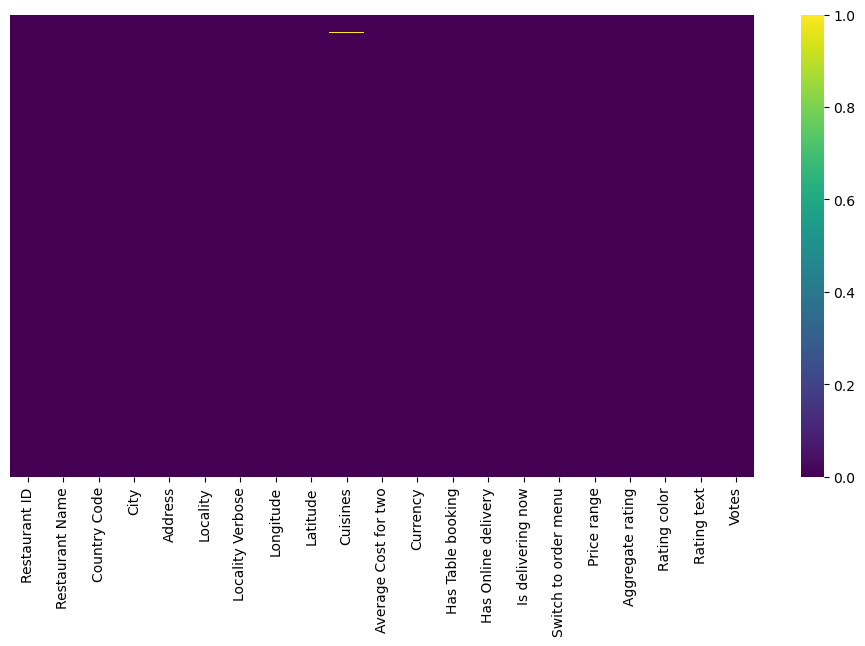

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')
plt.show()

In [15]:
df_country=pd.read_excel('Country-Code.xlsx')

In [17]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
df_final=pd.merge(df,df_country, on='Country Code', how='left')
df_final.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## 2. Top 3 countries which uses zomato

In [21]:
country_value=df_final.Country.value_counts().values
country_name=df_final.Country.value_counts().index

([<matplotlib.patches.Wedge at 0x2423c064980>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

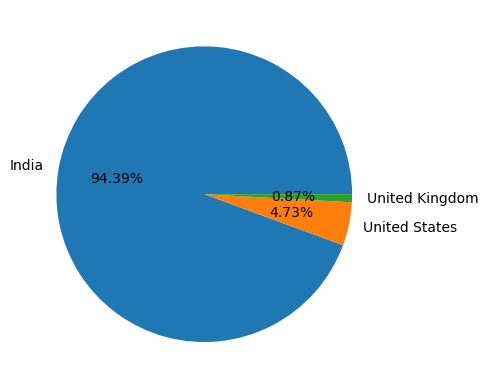

In [23]:
plt.pie(country_value[:3], labels=country_name[:3],autopct='%1.2f%%')

#### Observation:India is the largest country with most zomato users at 94.39%, followed by United States at 4.73% and United Kingdom at 0.87 %

In [25]:
ratings=df_final.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


#### Observation:
#### When rating between 4.5 to 4.9 = Excellent,
#### When rating between 4.0 to 4.4 = Very Good,
#### When rating between 3.5 to 3.9 = Good,
#### When rating between 2.5 to 3.4 = Average,
#### When rating between 1.8 to 2.4 = Poor,
#### When rating is 0 = Not Rated


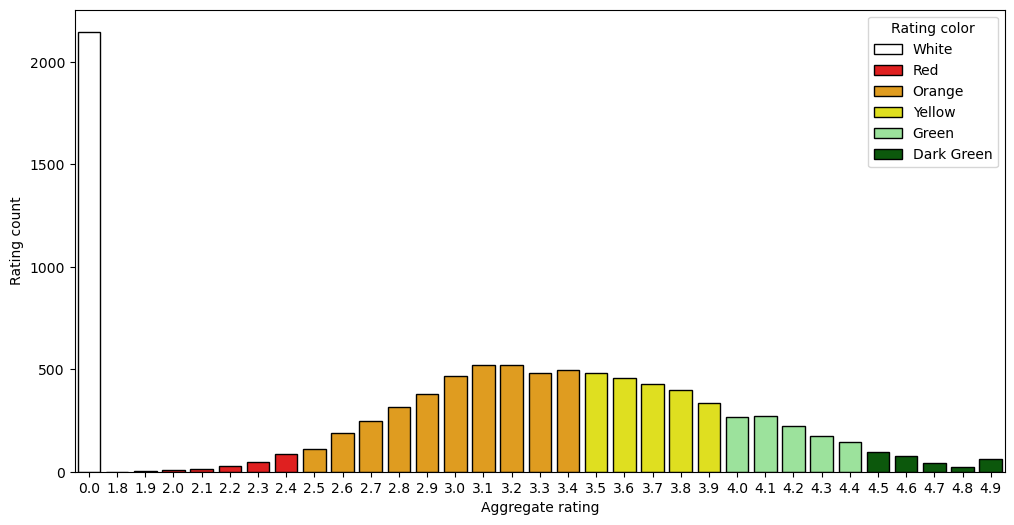

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=ratings, x='Aggregate rating', y='Rating count', hue='Rating color', palette=['White','Red','Orange','Yellow','#90EE90','darkgreen'],edgecolor='black')
plt.show()

#### Observation
#### 1. Not Rating count is very high
#### 2. Most rating is between 2.5 to 3.4

## Countries that have given zero ratings

In [29]:
df_final[df_final['Aggregate rating']==0.0].groupby('Country').size().reset_index().rename(columns={0:'Zero Rating Count'}).sort_values(by='Zero Rating Count', ascending=False)

,Country,Zero Rating Count
1,India,2139
0,Brazil,5
3,United States,3
2,United Kingdom,1


#### Observation : Maximum number of zero ratings are from Indian Customers

## Which currency is used by which country

In [31]:
df_final[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()


,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Which country has online food delivery option?

In [33]:
df_final.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [35]:
online_delivery=df_final[df_final['Has Online delivery']=='Yes'].Country.value_counts()

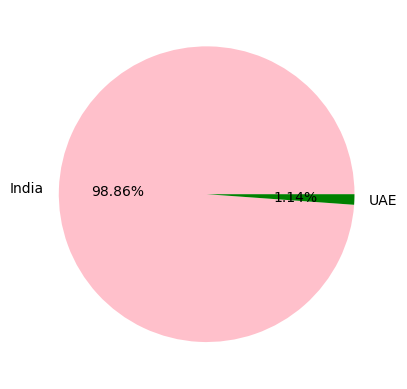

In [37]:
plt.pie(x=online_delivery.values, labels=online_delivery.index, colors=['Pink','Green'], autopct='%1.2f%%')
plt.show()

## Top 5 cities with most transactions

In [39]:
city_value=df_final['City'].value_counts().values
city_index=df_final['City'].value_counts().index

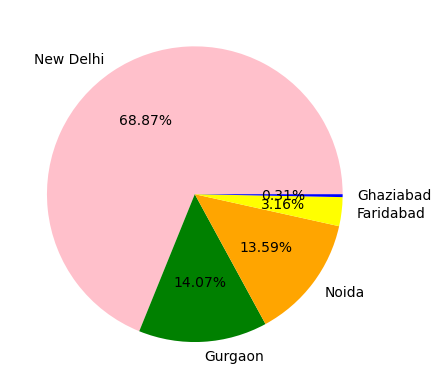

In [41]:
plt.pie(x=city_value[:5], labels=city_index[:5], autopct='%1.2f%%', colors=['Pink','Green','Orange','Yellow','Blue'],)
plt.show()

## Top 10 cuisines by total orders

In [43]:
top_cuisines=df_final.groupby('Cuisines').size().reset_index().rename(columns={0:'Order Count'}).sort_values(by='Order Count', ascending=False).head(10)

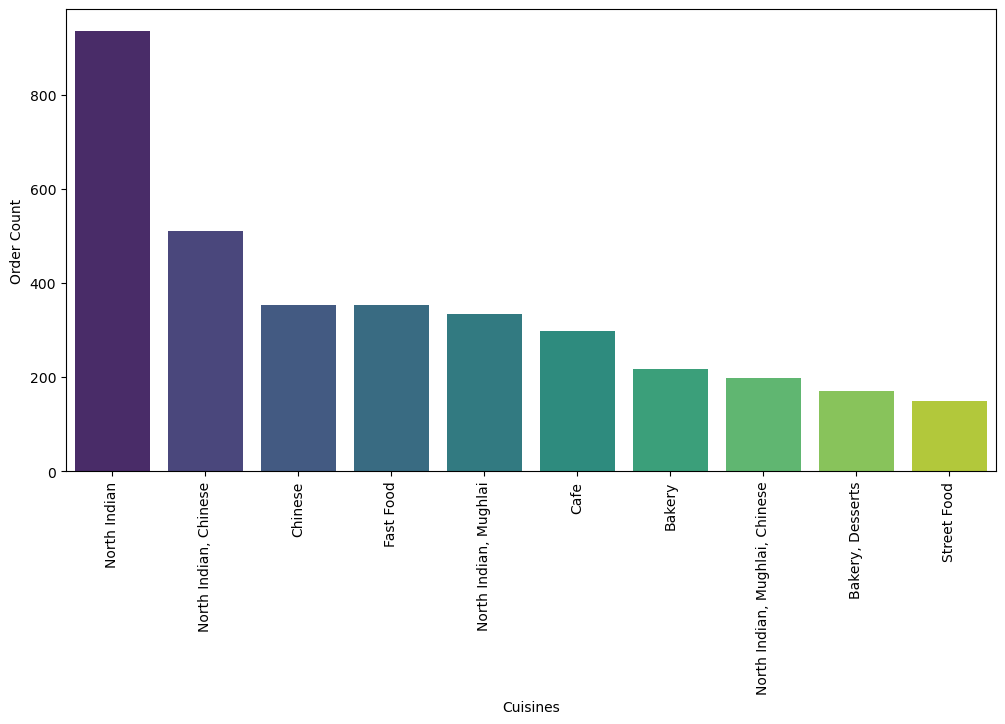

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_cuisines, x='Cuisines',y='Order Count',hue='Cuisines',palette='viridis')
plt.xticks(rotation=90)
plt.show()

#### Observation: North Indian is the most ordered cuisine followed by North Indian Chinese and Chinese cuisine is at 3rd place

## Top Cuisines with excellent ratings

In [47]:
top_cuisine_rating=df_final[df_final['Aggregate rating']>=4.5].Cuisines.value_counts().reset_index().head(10)

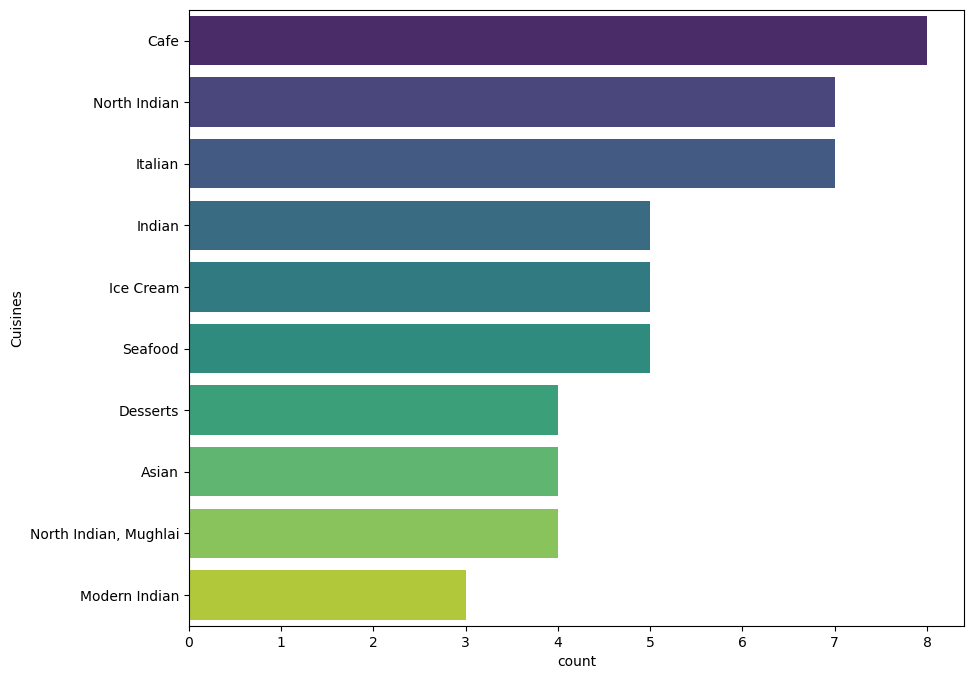

In [49]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_cuisine_rating, y='Cuisines',x='count',hue='Cuisines',palette='viridis')
plt.show()

## Top Restaurant by votes

In [83]:
df_final.groupby(['Restaurant Name','Votes']).size().reset_index().sort_values(by='Votes', ascending=False).head(10)

,Restaurant Name,Votes,0
8723,Toit,10934,1
8776,Truffles,9667,1
3739,Hauz Khas Social,7931,1
6187,Peter Cat,7574,1
122,AB's - Absolute Barbecues,6907,1
806,Barbeque Nation,5966,1
998,Big Brewsky,5705,1
121,AB's - Absolute Barbecues,5434,1
8160,The Black Pearl,5385,1
775,BarBQ,5288,1


#### Observation: Toit is the most voted restuarant followed by Truffles and Hauz Khas Social